In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
cell_df = pd.read_csv('cell_samples.csv')
cell_df.tail()
cell_df.shape
cell_df.size
cell_df.count()
cell_df['Class'].value_counts()


2    458
4    241
Name: Class, dtype: int64

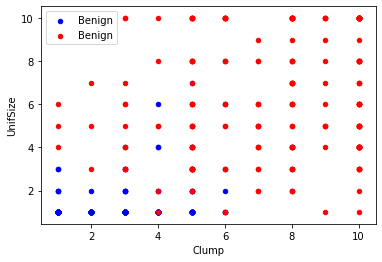

In [13]:
benign_df = cell_df[cell_df['Class']==2][0:200]
malignant_df = cell_df[cell_df['Class']==4][0:200]

axes = benign_df.plot(kind='scatter', x='Clump',y='UnifSize', color='blue', label = 'Benign')

malignant_df.plot(kind='scatter', x='Clump',y='UnifSize', color='red', label = 'Benign', ax=axes)

In [15]:
cell_df.dtypes
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [17]:
cell_df.columns

feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x = np.asarray(feature_df)

y = np.asarray(cell_df['Class'])

x[0:5]


array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=4)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(137,)

In [24]:
from sklearn import svm
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(x_train, y_train)
Y_predict = classifier.predict(x_test)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

